In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists
from urllib.parse import quote_plus as urlquote

import pymysql
pymysql.install_as_MySQLdb()
from scipy import stats

# Hypothesis
Does the rating of a movie affect the revenue?

 - (Null Hypothesis):Rating doesn't have a signification affect on revenue
 - Alternative Hypothesis): Rating does have a signification affect on revenue

In [2]:
data2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')

In [3]:
data2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [4]:
df = pd.concat([data2000, data2001], axis=0)
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,0.0,180.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,The Business of Love,Karobaar,0.0,5.5,2.0,NaN


In [5]:
df = df.drop(labels=0, axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4475 entries, 1 to 2269
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                4475 non-null   object 
 1   adult                  4475 non-null   float64
 2   backdrop_path          1993 non-null   object 
 3   belongs_to_collection  252 non-null    object 
 4   budget                 4475 non-null   float64
 5   genres                 4475 non-null   object 
 6   homepage               224 non-null    object 
 7   id                     4475 non-null   float64
 8   original_language      4475 non-null   object 
 9   original_title         4475 non-null   object 
 10  overview               4126 non-null   object 
 11  popularity             4475 non-null   float64
 12  poster_path            3830 non-null   object 
 13  production_companies   4475 non-null   object 
 14  production_countries   4475 non-null   object 
 15  rele

In [6]:
import json
def get_genre_name(x):
    x = x.replace("'",'"')
    x = json.loads(x)
    
    genres = []
    for genre in x:
        genres.append(genre['name'])
    return genres

In [7]:
df['genres_list'] = df['genres'].apply(get_genre_name)
df_explode = df.explode('genres_list')
df_explode

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,genres_list
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN,Comedy
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN,Music
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.5,22.0,NaN,Romance
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.1,8.0,NaN,Science Fiction
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.0,1.0,NaN,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,tt8929248,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 18, '...",NaN,78417.0,ta,அழகான நாட்கள்,...,150.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Azhagana Naatkal,0.0,0.0,0.0,NaN,Comedy
2266,tt8942962,0.0,/gTXCI8ixWjRyll0IwYX4Fk8Mcqe.jpg,NaN,0.0,[],NaN,273575.0,ta,Dosth,...,0.0,[],Released,NaN,Dost,0.0,3.0,1.0,NaN,NaN
2267,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",NaN,201706.0,cn,致命密函,...,90.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,NaN,Chinese Heroes,0.0,3.0,2.0,NaN,Action
2268,tt9099724,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,616033.0,ja,6週間プライヴェートモーメント,...,102.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,NaN,Rokushukan Private Moment,0.0,0.0,0.0,NaN,Drama


In [8]:
unique_genres = df_explode['genres_list'].dropna().unique()
unique_genres

array(['Comedy', 'Music', 'Romance', 'Science Fiction', 'Drama', 'Action',
       'Crime', 'Adventure', 'Animation', 'Fantasy', 'Thriller', 'Horror',
       'History', 'Family', 'Mystery', 'Western', 'War', 'TV Movie',
       'Documentary'], dtype=object)

In [9]:
for genre in unique_genres:
    df[f"Genre_{genre}"] = df['genres'].str.contains(genre,regex =False)
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,Genre_Fantasy,Genre_Thriller,Genre_Horror,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,False,False,False,False,False,False,False,False,False,False
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,False,False,False,False,False,False,False,False,False,False
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,False,False,False,False,False,False,False,False,False,False
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,579396.0,hi,Karobaar,...,False,False,False,False,False,False,False,False,False,False
5,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,tt8929248,0.0,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 18, '...",NaN,78417.0,ta,அழகான நாட்கள்,...,False,False,False,False,True,False,False,False,False,False
2266,tt8942962,0.0,/gTXCI8ixWjRyll0IwYX4Fk8Mcqe.jpg,NaN,0.0,[],NaN,273575.0,ta,Dosth,...,False,False,False,False,False,False,False,False,False,False
2267,tt9071078,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}]",NaN,201706.0,cn,致命密函,...,False,False,False,False,False,False,False,False,False,False
2268,tt9099724,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,616033.0,ja,6週間プライヴェートモーメント,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df  = df.drop(columns=['genres','genres_list'])
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,homepage,id,original_language,original_title,overview,...,Genre_Fantasy,Genre_Thriller,Genre_Horror,Genre_History,Genre_Family,Genre_Mystery,Genre_Western,Genre_War,Genre_TV Movie,Genre_Documentary
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,...,False,False,False,False,False,False,False,False,False,False
2,tt0113092,0.0,NaN,NaN,0.0,NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,...,False,False,False,False,False,False,False,False,False,False
3,tt0116391,0.0,NaN,NaN,0.0,NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",...,False,False,False,False,False,False,False,False,False,False
4,tt0116748,0.0,/wr0hTHwkYIRC82MwNbhOvqrw27N.jpg,NaN,0.0,NaN,579396.0,hi,Karobaar,Wealthy Rajiv Sinha and middle-classed Amar Sa...,...,False,False,False,False,False,False,False,False,False,False
5,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,NaN,843.0,cn,花樣年華,"Hong Kong, 1962: Chow Mo-Wan and Su Li-Zhen mo...",...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,tt8929248,0.0,NaN,NaN,0.0,NaN,78417.0,ta,அழகான நாட்கள்,Chandru agrees to marry the girl of his father...,...,False,False,False,False,True,False,False,False,False,False
2266,tt8942962,0.0,/gTXCI8ixWjRyll0IwYX4Fk8Mcqe.jpg,NaN,0.0,NaN,273575.0,ta,Dosth,Dosth is a 2001 Tamil language film directed b...,...,False,False,False,False,False,False,False,False,False,False
2267,tt9071078,0.0,NaN,NaN,0.0,NaN,201706.0,cn,致命密函,A good-natured kung fu kid gets caught up in c...,...,False,False,False,False,False,False,False,False,False,False
2268,tt9099724,0.0,NaN,NaN,0.0,NaN,616033.0,ja,6週間プライヴェートモーメント,NaN,...,False,False,False,False,False,False,False,False,False,False


In [11]:
df['certification'] = df['certification'].str.strip()
df['certification'].value_counts(dropna=False)

NaN        3651
R           467
PG-13       183
NR           73
PG           66
G            26
NC-17         7
Unrated       1
-             1
Name: certification, dtype: int64

In [14]:
repl_cert = {'Not Rated':'NR',
             'Unrated':'NR',
             '-':'NR',}
df['certification'] = df['certification'].replace(repl_cert)
df['certification'].value_counts(dropna=False)

NaN      3651
R         467
PG-13     183
NR         75
PG         66
G          26
NC-17       7
Name: certification, dtype: int64

In [15]:
df.drop(df.loc[df['revenue']==0].index, inplace=True)

In [16]:
df.dropna(subset=['certification'], inplace=True)

In [17]:
df['revenue'] = df['revenue'].astype(float)

In [18]:
needed_cols = ['certification', 'revenue']
df[needed_cols].head()

,certification,revenue
21,PG-13,546388105.0
23,PG,36754634.0
24,G,169327687.0
26,PG,36609995.0
38,R,53187659.0


In [19]:
df['certification'].value_counts()

R        32
PG-13    28
PG       11
G         3
NR        2
Name: certification, dtype: int64

In [25]:
R = df.loc[df['certification'] == 'R', needed_cols]
R.head()

,certification,revenue
38,R,53187659.0
39,R,14828081.0
59,R,15843608.0
83,R,270813.0
100,R,31355910.0


In [24]:
PG13 = df.loc[df['certification'] == 'PG-13', needed_cols]
PG13.head()

,certification,revenue
21,PG-13,546388105.0
116,PG-13,291420351.0
127,PG-13,5217498.0
256,PG-13,58292295.0
259,PG-13,15427192.0


In [26]:
PG = df.loc[df['certification'] == 'PG', needed_cols]
PG.head()

,certification,revenue
23,PG,36754634.0
26,PG,36609995.0
44,PG,76432727.0
87,PG,59468275.0
162,PG,345823040.0


In [27]:
G = df.loc[df['certification'] == 'G', needed_cols]
G.head()

,certification,revenue
24,G,169327687.0
315,G,27965865.0
460,G,19748009.0


In [28]:
NR = df.loc[df['certification'] == 'NR', needed_cols]
NR.head()

,certification,revenue
134,NR,9200.0
1058,NR,20000000.0


In [29]:
R_group = R['revenue']
PG13_group = PG13['revenue']
PG_group = PG['revenue']
G_group = G['revenue']
NR_group = NR['revenue']

## outliner

In [30]:
R_outliers = np.abs(stats.zscore(R_group))>3
R_outliers.value_counts()

False    30
True      2
Name: revenue, dtype: int64

In [31]:
PG13_outliers = np.abs(stats.zscore(PG13_group))>3
PG13_outliers.value_counts()

False    27
True      1
Name: revenue, dtype: int64

In [35]:
PG_outliers = np.abs(stats.zscore(PG_group))>3
PG_outliers.value_counts()

False    11
Name: revenue, dtype: int64

In [36]:
G_outliers = np.abs(stats.zscore(G_group))>3
G_outliers.value_counts()

False    3
Name: revenue, dtype: int64

In [37]:
NR_outliers = np.abs(stats.zscore(NR_group))>3
NR_outliers.value_counts()

False    2
Name: revenue, dtype: int64

In [38]:
R_group = R_group[(np.abs(stats.zscore(R_group)) < 3)]

In [39]:
PG13_group = PG13_group[(np.abs(stats.zscore(PG13_group)) < 3)]

## Normailty Testing

In [41]:
stats.normaltest(R_group)

NormaltestResult(statistic=24.857331543514103, pvalue=4.002202306396073e-06)

In [42]:
stats.normaltest(PG13_group)

NormaltestResult(statistic=16.080387775803935, pvalue=0.0003222464643707059)

In [44]:
stats.normaltest(PG_group)

C:\Users\Ivy\anaconda3\envs\dojo-env\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=17.258897084672235, pvalue=0.00017876319832439637)

In [45]:
stats.normaltest(G_group)

ValueError: skewtest is not valid with less than 8 samples; 3 samples were given.

In [46]:
stats.normaltest(NR_group)

ValueError: skewtest is not valid with less than 8 samples; 2 samples were given.

In [50]:
result = stats.levene(R_group, PG13_group, PG_group, G_group, NR_group )
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=2.483266644283935, pvalue=0.051734074116924385)
False


In [53]:
result = stats.f_oneway(R_group, PG13_group, PG_group, G_group, NR_group)
print(result)
result.pvalue < .05

F_onewayResult(statistic=2.758553011994901, pvalue=0.0345953893115165)


True

p-value is greater than 0.05 so we reject the null hypothesis.

Rating does have a signification affect on revenue.



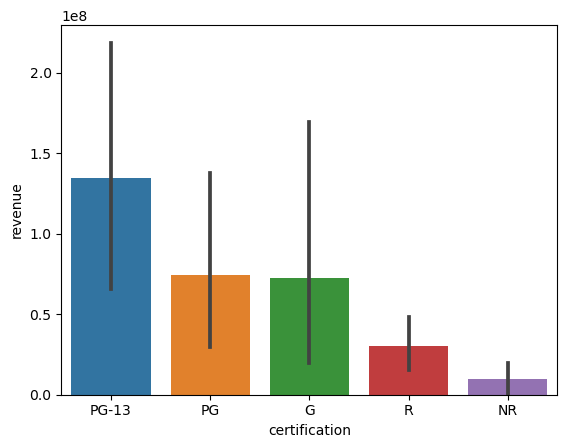

In [54]:
sns.barplot(data = df, x = "certification", y = "revenue");